# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 625


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


    # Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
   

        # Parse the JSON and retrieve data
city_weather = requests.get(city_url)
city_weather_json = city_weather.json()

print(city_weather_json)


{'coord': {'lon': -72.4875, 'lat': -51.7236}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.28, 'feels_like': 273.67, 'temp_min': 275.28, 'temp_max': 275.28, 'pressure': 990, 'humidity': 96, 'sea_level': 990, 'grnd_level': 987}, 'visibility': 10000, 'wind': {'speed': 1.61, 'deg': 7, 'gust': 2.26}, 'clouds': {'all': 89}, 'dt': 1691622174, 'sys': {'country': 'CL', 'sunrise': 1691583248, 'sunset': 1691617015}, 'timezone': -10800, 'id': 3874958, 'name': 'Puerto Natales', 'cod': 200}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()                           

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | severo-yeniseyskiy
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | sorochinsk
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | ayaguz
City not found. Skipping...
Processing Record 10 of Set 1 | plast
Processing Record 11 of Set 1 | mundo novo
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | madalena
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | ambodifotatra
Processing Record 17 of Set 1 | toga village
City not found. Skipping...
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | boa vista
Processing R

Processing Record 32 of Set 4 | ialibu
Processing Record 33 of Set 4 | camlachie
Processing Record 34 of Set 4 | port isabel
Processing Record 35 of Set 4 | mountain home
Processing Record 36 of Set 4 | delvada
Processing Record 37 of Set 4 | karbala
Processing Record 38 of Set 4 | bogale
Processing Record 39 of Set 4 | crane
Processing Record 40 of Set 4 | revda
Processing Record 41 of Set 4 | mumford
Processing Record 42 of Set 4 | enewetak
Processing Record 43 of Set 4 | jiwani
Processing Record 44 of Set 4 | polyarnyy
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | el bolson
Processing Record 47 of Set 4 | atafu village
Processing Record 48 of Set 4 | todos santos
Processing Record 49 of Set 4 | pangody
Processing Record 0 of Set 5 | jayapura
Processing Record 1 of Set 5 | fort bragg
Processing Record 2 of Set 5 | gerash
Processing Record 3 of Set 5 | ca mau
Processing Record 4 of Set 5 | shawinigan
Processing Record 5 of Set 5 | nadym
Processing Record

Processing Record 24 of Set 8 | san julian
Processing Record 25 of Set 8 | salekhard
Processing Record 26 of Set 8 | port glaud
City not found. Skipping...
Processing Record 27 of Set 8 | kavieng
Processing Record 28 of Set 8 | villa alberto andres alvarado aramburo
City not found. Skipping...
Processing Record 29 of Set 8 | ungsang-nodongjagu
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | east end
Processing Record 32 of Set 8 | tarinkot
Processing Record 33 of Set 8 | askoy
Processing Record 34 of Set 8 | sibolga
Processing Record 35 of Set 8 | susuman
Processing Record 36 of Set 8 | chake chake
Processing Record 37 of Set 8 | mangai
Processing Record 38 of Set 8 | remire-montjoly
Processing Record 39 of Set 8 | hadibu
Processing Record 40 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 41 of Set 8 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 8 | talcahuano
Processing Record 43 of Set 8 | chibougamau
Processing R

Processing Record 11 of Set 12 | la ligua
Processing Record 12 of Set 12 | vernon
Processing Record 13 of Set 12 | kununurra
Processing Record 14 of Set 12 | taco pozo
Processing Record 15 of Set 12 | sur
Processing Record 16 of Set 12 | kiffa
Processing Record 17 of Set 12 | solnechnyy
Processing Record 18 of Set 12 | mount gambier
Processing Record 19 of Set 12 | inari
Processing Record 20 of Set 12 | ndele
Processing Record 21 of Set 12 | male
Processing Record 22 of Set 12 | lityn
Processing Record 23 of Set 12 | fortuna
Processing Record 24 of Set 12 | kolonia
Processing Record 25 of Set 12 | peterborough
Processing Record 26 of Set 12 | palikir - national government center
Processing Record 27 of Set 12 | star dojran
Processing Record 28 of Set 12 | nova sintra
Processing Record 29 of Set 12 | michurinsk
Processing Record 30 of Set 12 | roma
Processing Record 31 of Set 12 | polva
Processing Record 32 of Set 12 | tanrake village
City not found. Skipping...
Processing Record 33 of 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,283.61,74,53,1.79,NZ,1691622173
1,grytviken,-54.2811,-36.5092,267.64,94,41,0.44,GS,1691622440
2,severo-yeniseyskiy,60.3725,93.0408,283.57,88,29,2.08,RU,1691622357
3,ribeira grande,38.5167,-28.7000,295.80,91,100,1.34,PT,1691622441
4,sorochinsk,52.4338,53.1583,290.09,70,35,2.40,RU,1691622442


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.61,74,53,1.79,NZ,1691622173
1,grytviken,-54.2811,-36.5092,267.64,94,41,0.44,GS,1691622440
2,severo-yeniseyskiy,60.3725,93.0408,283.57,88,29,2.08,RU,1691622357
3,ribeira grande,38.5167,-28.7000,295.80,91,100,1.34,PT,1691622441
4,sorochinsk,52.4338,53.1583,290.09,70,35,2.40,RU,1691622442


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

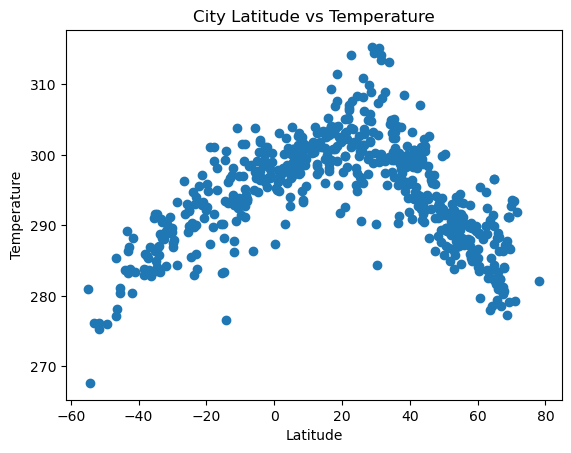

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

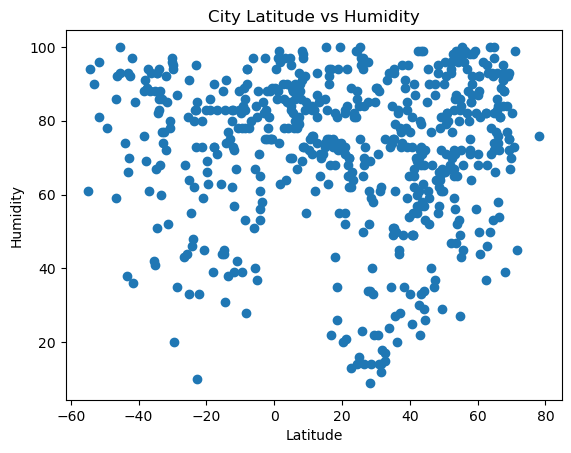

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

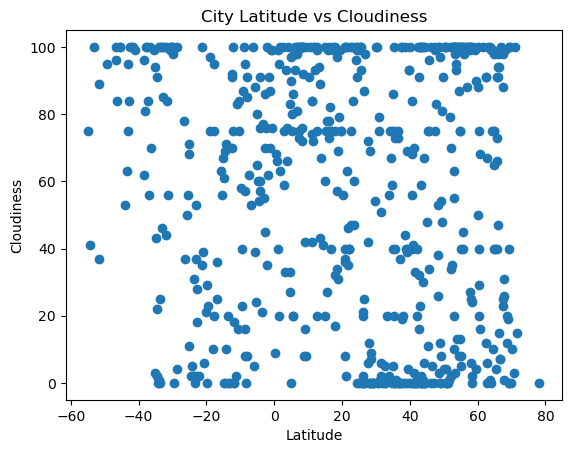

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

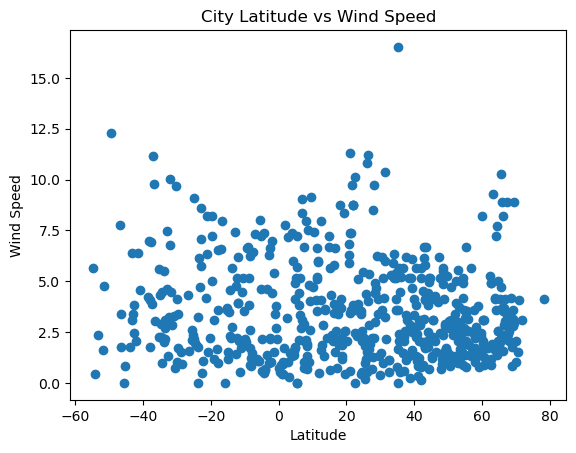

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,severo-yeniseyskiy,60.3725,93.0408,283.57,88,29,2.08,RU,1691622357
3,ribeira grande,38.5167,-28.7000,295.80,91,100,1.34,PT,1691622441
4,sorochinsk,52.4338,53.1583,290.09,70,35,2.40,RU,1691622442
7,plast,54.3691,60.8136,287.03,86,8,4.17,RU,1691622444
9,iqaluit,63.7506,-68.5145,278.00,100,100,4.12,CA,1691622445


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,283.61,74,53,1.79,NZ,1691622173
1,grytviken,-54.2811,-36.5092,267.64,94,41,0.44,GS,1691622440
5,port-aux-francais,-49.3500,70.2167,276.07,78,95,12.27,TF,1691622442
6,port alfred,-33.5906,26.8910,288.81,88,25,2.68,ZA,1691622443
8,mundo novo,-11.8589,-40.4725,292.94,72,18,3.91,BR,1691622444


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4604293547349075
Correlation coefficient (r-value): -0.6785494489975712


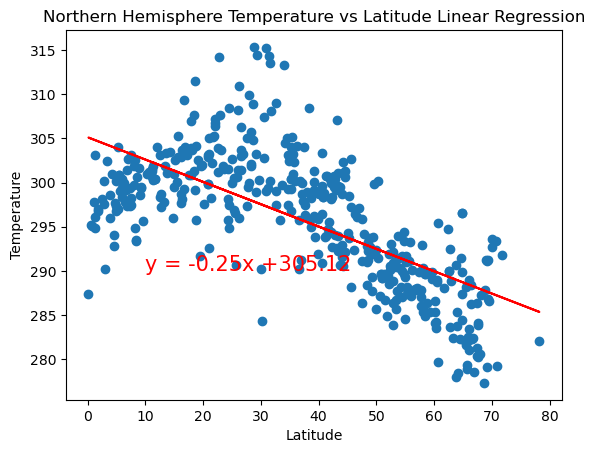

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,290),fontsize=15,color="red")
plt.title('Northern Hemisphere Temperature vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()



The r-squared is: 0.649466788194643
Correlation coefficient (r-value): 0.8058950230610951


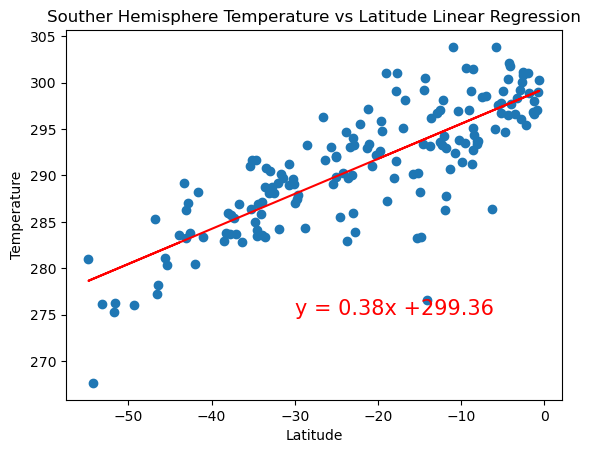

In [26]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")
plt.title('Souther Hemisphere Temperature vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()

**Discussion about the linear relationship:** Northern Hemisphere Temp shows -0.67 rvalue showing a strong negative correlation. Meanhwile the Southern Hemisphere Temp shows 0.80 rvalue showing a strong positive correlation.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.00011092463067047881
Correlation coefficient (r-value): -0.010532076275382685


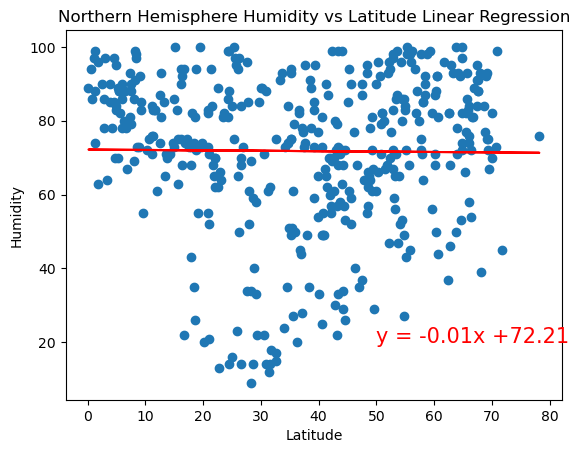

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()

The r-squared is: 0.012615129974684926
Correlation coefficient (r-value): -0.11231709564747891


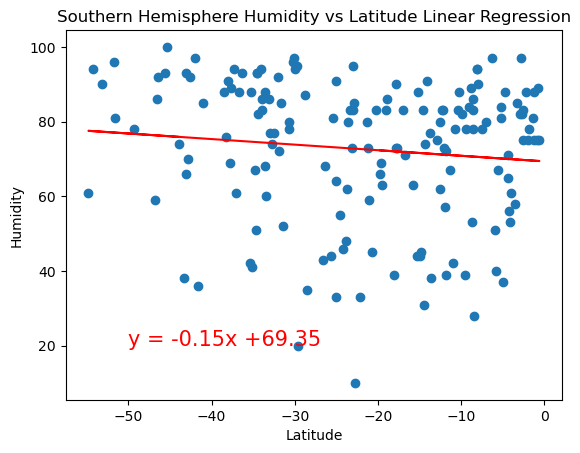

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Southern Hemisphere Humidity vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()

**Discussion about the linear relationship:** Northern Hemisphere humidity shows -0.10 rvalue showing a weak or no correlation. Meanhwile the Southern Hemisphere humidity shows -0.11 rvalue showing a weak or no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.023500657341734565
Correlation coefficient (r-value): -0.1532992411649013


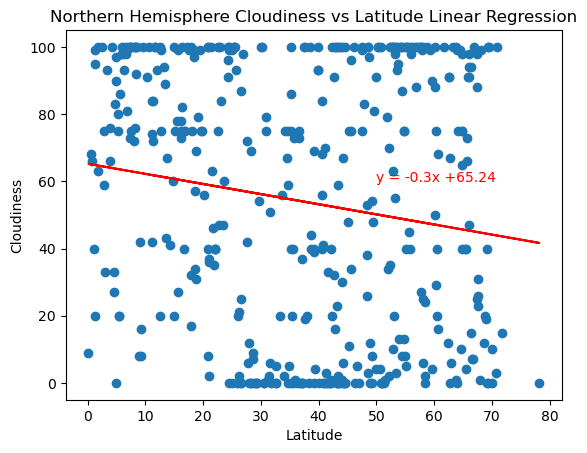

In [29]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,60),fontsize=10,color="red")
plt.title('Northern Hemisphere Cloudiness vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()

The r-squared is: 0.029513089206509857
Correlation coefficient (r-value): -0.171793740300716


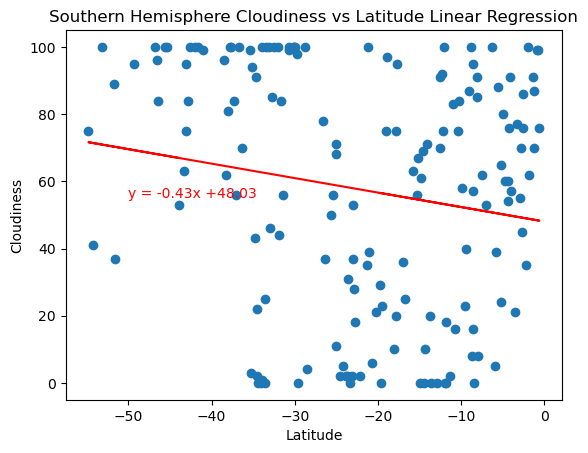

In [30]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,55),fontsize=10,color="red")
plt.title('Southern Hemisphere Cloudiness vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()

**Discussion about the linear relationship:** Northern Hemisphere cloudiness shows -0.15 rvalue showing a weak or no correlation. Meanhwile the Southern Hemisphere cloudiness shows -0.17 rvalue showing a weak or no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.007609044517203358
Correlation coefficient (r-value): -0.08722983731042583


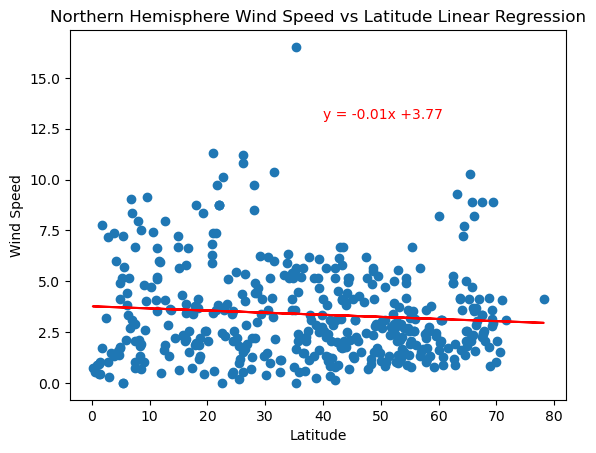

In [31]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,13),fontsize=10,color="red")
plt.title('Northern Hemisphere Wind Speed vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)

plt.show()

The r-squared is: 0.00914410233823012
Correlation coefficient (r-value): -0.09562479980752964


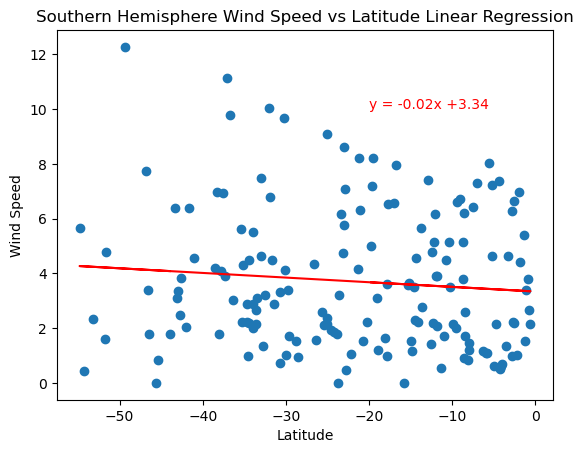

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,10),fontsize=10,color="red")
plt.title('Southern Hemisphere Wind Speed vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")
print("Correlation coefficient (r-value):", rvalue)
plt.show()

**Discussion about the linear relationship:** Northern Hemisphere wind speed shows -0.08 rvalue showing a weak or no correlation. Meanhwile the Southern Hemisphere wind speed shows -0.95 rvalue showing a weak or no correlation.